**Installs and imports**

In [296]:
%pip install ijson
%pip install arabert


You should consider upgrading via the 'c:\Users\kewi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\kewi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [297]:
import os
import json
import ijson
import pandas as pd
import os
import json
from transformers import AutoTokenizer
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns ,sklearn,gensim
from nltk.corpus import stopwords
from collections import  Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kewi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Read the data from** https://github.com/adelmeleka/AQAD

In [298]:
with open('AQAD-master/AQQAD 1.0/FINAL_AAQAD-v1.0.json','rb') as f:
  data = json.load(f)

for allData in data['data']:
    print(allData['title']+"\n")
    print(allData['paragraphs'])
    break

بيونسيه

[{'qas': [{'question': 'متى بدأت بيونسي تصبح شعبية؟', 'id': 1, 'answers': [{'text': 'في أواخر التسعينات', 'answer_start': 220}], 'is_impossible': False}, {'question': 'ما هي المجالات التي تنافس عليها بيونسيه عندما كانت تكبر؟', 'id': 2, 'answers': [{'text': 'غناء ورقص', 'answer_start': 173}], 'is_impossible': False}, {'question': 'متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟', 'id': 3, 'answers': [{'text': '(2003)،', 'answer_start': 515}], 'is_impossible': False}, {'question': 'في أي مدينة و ولاية نشأت بيونسيه؟', 'id': 4, 'answers': [{'text': 'هيوستن بولاية تكساس،', 'answer_start': 88}], 'is_impossible': False}, {'question': 'في أي عقد أصبحت بيونسي مشهورة؟', 'id': 5, 'answers': [{'text': 'أواخر التسعينات', 'answer_start': 223}], 'is_impossible': False}, {'question': 'في أي مجموعة R&B كانت هي المغنية الرئيسية؟', 'id': 6, 'answers': [{'text': 'دستنيز تشايلد', 'answer_start': 290}], 'is_impossible': False}, {'question': 'ما الألبوم الذي جعلها فنانة معروفة عالميا؟', 'id': 7, 'ans

#DATA ANALYSIS

In [299]:
rows = []
for entry in data['data']:
    title = entry['title']
    for paragraph in entry['paragraphs']:
        for qa in paragraph['qas']:
            question = qa['question']
            answer = qa['answers']
            is_impossible = qa['is_impossible']
            rows.append((title, question, answer, is_impossible))
df = pd.DataFrame(rows, columns=['title', 'question', 'answer', 'is_impossible'])
df.head()

,title,question,answer,is_impossible
0,بيونسيه,متى بدأت بيونسي تصبح شعبية؟,"[{'text': 'في أواخر التسعينات', 'answer_start'...",False
1,بيونسيه,ما هي المجالات التي تنافس عليها بيونسيه عندما ...,"[{'text': 'غناء ورقص', 'answer_start': 173}]",False
2,بيونسيه,متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟,"[{'text': '(2003)،', 'answer_start': 515}]",False
3,بيونسيه,في أي مدينة و ولاية نشأت بيونسيه؟,"[{'text': 'هيوستن بولاية تكساس،', 'answer_star...",False
4,بيونسيه,في أي عقد أصبحت بيونسي مشهورة؟,"[{'text': 'أواخر التسعينات', 'answer_start': 2...",False


In [300]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 17911
Number of columns: 4


In [301]:
unique_titles = df['title'].unique()
print('Unique titles:', unique_titles)

Unique titles: ['بيونسيه' 'آي بود' 'ذا ليجند أوف زيلدا: توايلايت برينسس'
 'طيف (فيلم 2015)' 'نيويورك' 'طاقة شمسية' 'كانييه ويست' 'بوذية'
 'أمريكان آيدول' 'كلب' 'جمهورية الكونغو' 'رئيس الوزراء' 'واي باك مشين'
 'إضاءة' 'عمارة' 'أرنولد شوارزنيجر' 'هرطقة' 'مادية' 'مسيحيون'
 'سوني للترفيه الموسيقي' 'الصيد وجمع الثمار' 'صندوق الأمم المتحدة للسكان'
 'ألكسندر غراهام بيل' 'مزود خدمة الإنترنت' 'قصص مصورة' 'سانت هيلينا'
 'زفر (صوتيات)' 'هيدروجين' 'سباق الفضاء' 'متصفح ويب'
 'نظام بايدو للملاحة بالأقمار الصناعية' 'قانون كنسي' 'اللغة الكتالونية'
 'بوسطن' 'يونيفرسال بيكشرز' 'ورق' 'توقيت صيفي'
 'إدارة الأرشيف والوثائق الوطنية' 'تريستان دا كونا' 'جامعة كانساس' 'برن'
 'ساوثهامبتون' 'معاهدة' 'جوزيف بروز تيتو' 'جزر مارشال' 'الألب' 'جين'
 'غينيا بيساو' 'دماغ' 'تلفاز عالي الدقة' 'خشب' 'العصور الوسطى' 'حاسوب'
 'العرق الأسود' 'ذي تايمز' 'هجرة الطيور' 'علم المناعة' 'إم بي 3' 'هيوستن'
 'نحاس' 'هوية' 'اتصال' 'عنب' 'أمن الحاسوب' 'حيوان' 'جعة' 'دولار أمريكي'
 'هانوفر' 'شعور' 'نادي إيفرتون' 'حاملة طائرات' 'إدارة ال

In [302]:
#topic entries
df['title'].value_counts()

يونانيون                   345
العصور الوسطى              288
أكسجين                     285
جمال عبد الناصر            270
الإمبراطورية البريطانية    250
                          ... 
فريدريش فون هايك             3
دومينيكانية                  3
الألب                        3
سانت هيلينا                  3
حيدر آباد                    3
Name: title, Length: 297, dtype: int64

<AxesSubplot:title={'center':'Question count by title'}, xlabel='title'>

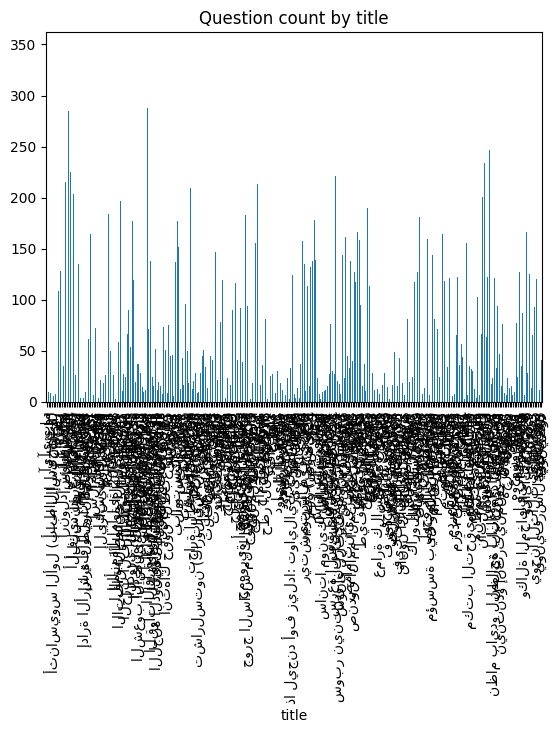

In [303]:
question_count = df.groupby('title')['question'].count()
question_count.plot(kind='bar', title='Question count by title')

In [304]:
df = df[df['answer'].str.len() > 0]

In [305]:
df['answer'].apply(lambda x: x[0]['text'])

0                                       في أواخر التسعينات
1                                                غناء ورقص
2                                                  (2003)،
3                                     هيوستن بولاية تكساس،
4                                          أواخر التسعينات
                               ...                        
17906                                              الأفلام
17907                                               بثلاثة
17908                       الشاي وعصير القصب والعرقسوس من
17909                                         الفول المدمس
17910    والأرز باللبن والعاشوراء والمهلبية والكِشك وال...
Name: answer, Length: 11493, dtype: object

In [306]:
df['question']

0                              متى بدأت بيونسي تصبح شعبية؟
1        ما هي المجالات التي تنافس عليها بيونسيه عندما ...
2           متى غادرت بيونسي طفل القدر وتصبح مغنية منفردة؟
3                        في أي مدينة و ولاية نشأت بيونسيه؟
4                           في أي عقد أصبحت بيونسي مشهورة؟
                               ...                        
17906    في أكثر من 100 عام ، كم عدد الأفلام التي تم إن...
17907                     ما هي حصة الإنتاج العربي من مصر؟
17908                                          ما هو كشري؟
17909                             ما يمكن إضافته إلى كشري؟
17910                 ما الفاصوليا المستخدمة لصنع الفلافل؟
Name: question, Length: 11493, dtype: object

In [307]:
avg_question_length = df['question'].str.len().mean()
avg_answer_length = df['answer'].apply(lambda x: len(x[0]['text'])).mean()
print('Average question length:', avg_question_length)
print('Average answer length:', avg_answer_length)

Average question length: 49.19707648133647
Average answer length: 22.312364047681196


<AxesSubplot:>

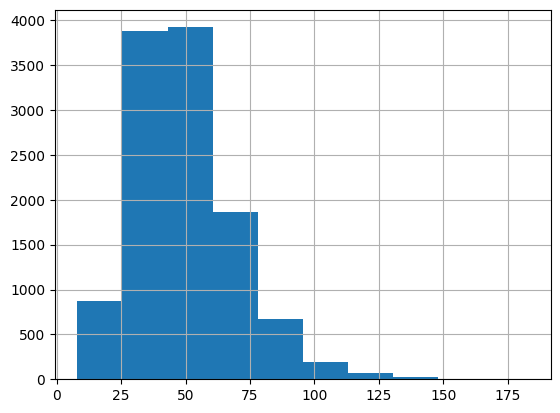

In [308]:
#the number of characters present in each question
df['question'].str.len().hist()

<AxesSubplot:>

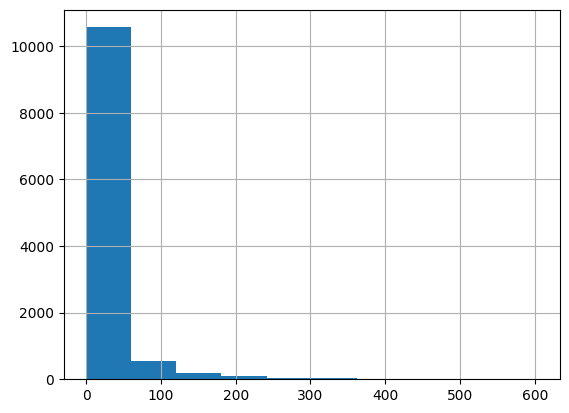

In [309]:
#the number of characters present in each answer
df['answer'].apply(lambda x: x[0]['text']).str.len().hist()

<AxesSubplot:>

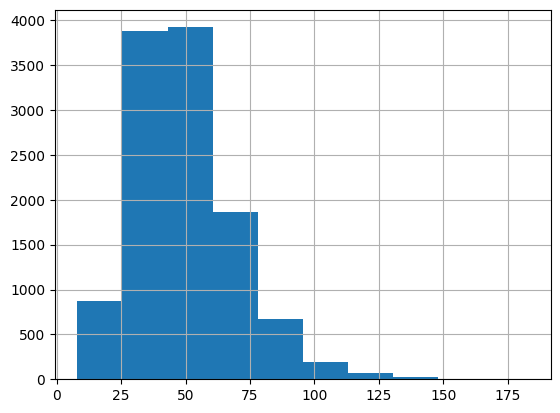

In [310]:
#the number of characters present in each question
df['question'].str.len().hist()

<AxesSubplot:>

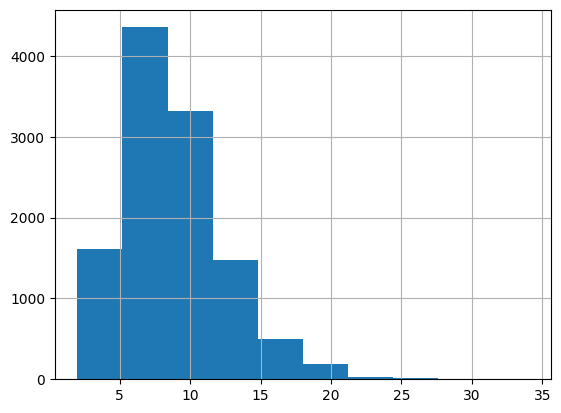

In [311]:
#number of words appearing in each question
df['question'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

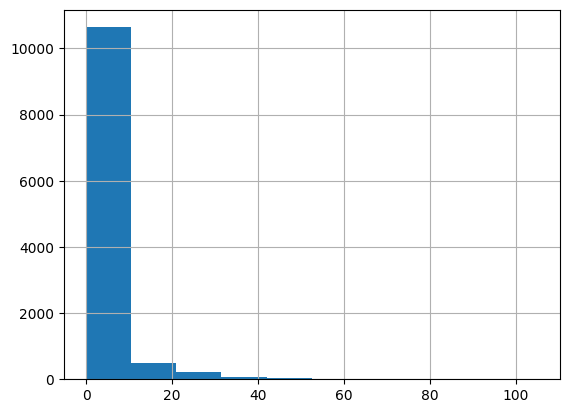

In [312]:
df['answer'].apply(lambda x: x[0]['text']).str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

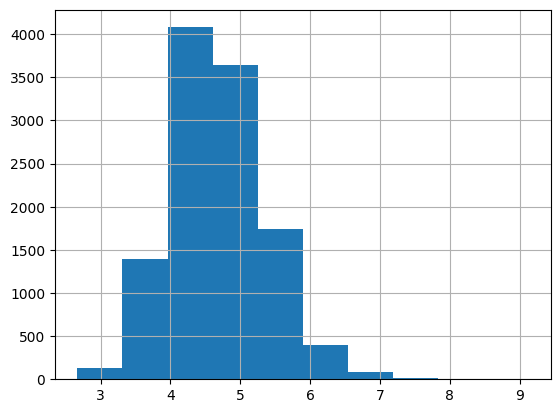

In [313]:
#average word length in each question
df['question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

c:\Users\kewi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kewi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

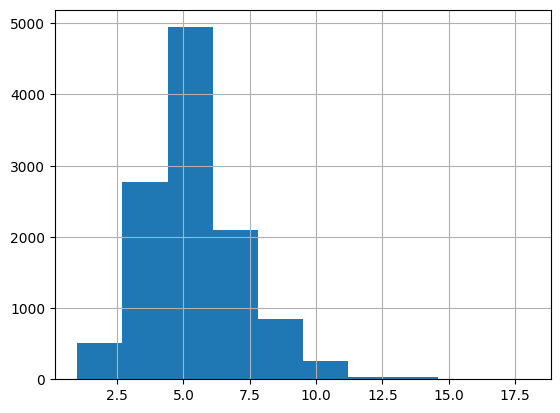

In [314]:
df['answer'].apply(lambda x: x[0]['text']).str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [315]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

<AxesSubplot:>

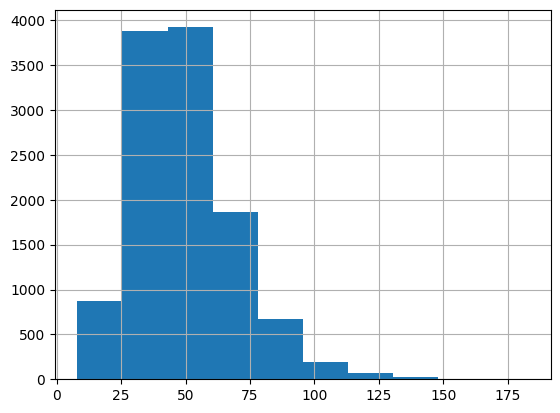

In [316]:
#the number of characters present in each question
df['question'].str.len().hist()

<AxesSubplot:>

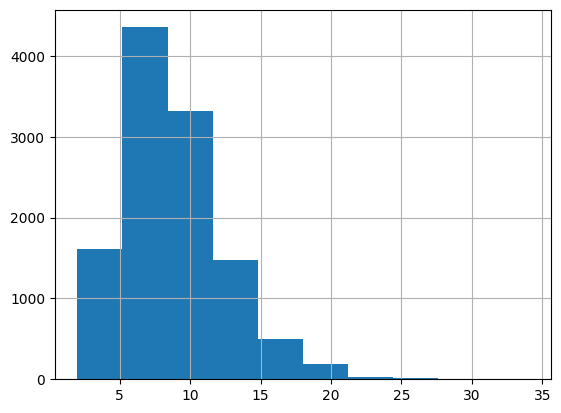

In [317]:
#number of words appearing in each question
df['question'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

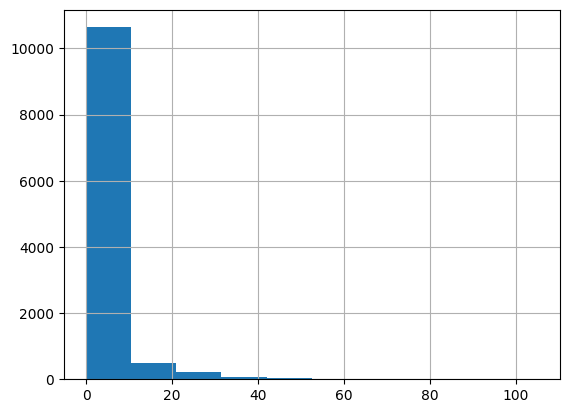

In [318]:
df['answer'].apply(lambda x: x[0]['text']).str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

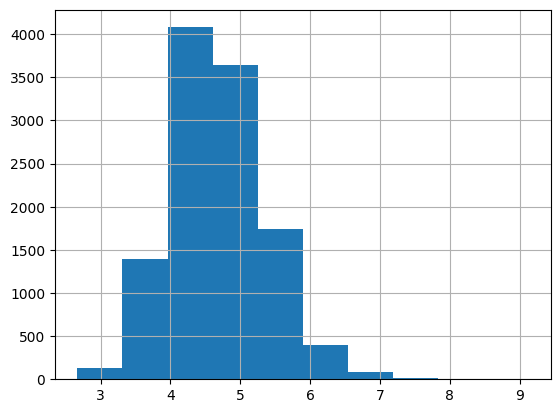

In [319]:
#average word length in each question
df['question'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

<AxesSubplot:>

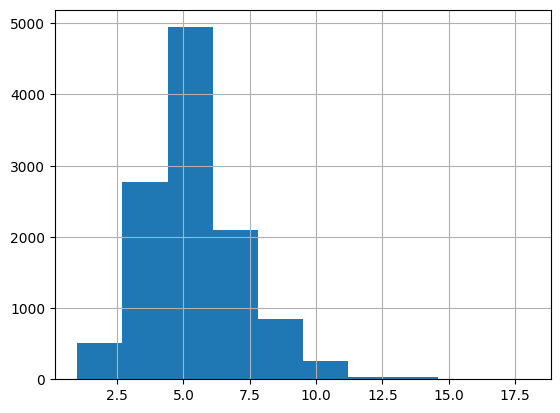

In [320]:
df['answer'].apply(lambda x: x[0]['text']).str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [321]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

**Parsing Data for preprocessing**

In [322]:
def parse_data(path):
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    # initialize lists for contexts, questions, and answers
    contexts = []
    questions = []
    answers = []
    # iterate through all data in squad data
    counter = 0
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                if 'plausible_answers' in qa.keys():
                    access = 'plausible_answers'
                else:
                    access = 'answers'
                for answer in qa[access]:
                    counter+=1
                    # append data to lists
                    contexts.append(context)
                    questions.append(question)
                    answers.append(answer)
    # return formatted data lists
    print(counter)
    return contexts, questions, answers

In [323]:
contexts, questions, answers = parse_data('AQAD-master/AQQAD 1.0/FINAL_AAQAD-v1.0.json')
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_contexts, val_contexts, train_questions, val_questions, train_answers, val_answers = train_test_split(contexts, questions, answers, test_size=0.1, random_state=42)

17896


In [324]:
print(len(train_questions))
display(train_questions[0:3])
print(len(train_answers))
display(train_answers[0:3])
print(len(train_contexts))
display(train_contexts[0:3])
print('-----------------------------------------')
print(len(val_questions))
display(val_questions[0:3])
print(len(val_answers))
display(val_answers[0:3])
print(len(val_contexts))
display(val_contexts[0:3])

16106


['ما الطريقة التي يمكن بها لمقاطع الفيديو أن تشبه لونًا متوسطًا؟',
 'كيف تحصل أرمينيا على معظم سلعها؟',
 'إلى أي نوع من الطوائف غير الكاثوليكية كان بول السادس يعتبر حليفًا عظيمًا لها؟']

16106


[{'text': 'اختيار طريقة من المهم أن تعرف ما نوع البيانات التي يتم ضغطها من أجل الحصول على نسبة ضغط',
  'answer_start': 340},
 {'text': 'حركة السكك الحديدية', 'answer_start': 580},
 {'text': 'الذين', 'answer_start': 265}]

16106


['المعادلة (2.1) هي في جوهرها ضغط متري نسبة بسيطة مبنية. بغض النظر عن نوع من وسائل الإعلام الرقمية يتم ضغطها (أي الصورة والنص، والصوت، الخ) نسبة ضغط صرح يعطي دلالة واضحة على ضغط تحقيقه.\nوهناك أنواع عديدة من الطريقة المستخدمة في هذه الأيام لضغط، وكلها لها خصائصها المميزة. نوع الطريقة المستخدمة يملي الانتروبيا من البيانات التي يتم ضغطها. عند اختيار طريقة من المهم أن تعرف ما نوع البيانات التي يتم ضغطها من أجل الحصول على نسبة ضغط الحد الأقصى الممكن. عند استخدام الانتروبي المدى بالتعاون مع الصور الرقمية لا يعني بالضرورة على المعلومات بكسل من الصورة. مؤخرا أصبح من الممكن لتخزين كيف تبدو صورة إدراكيا. عند تطبيق مثل هذا النموذج قد يعني أن الصورة تم تعديل طفيف خلال دورة ضغط / التوسع دون التأثير على الجودة المدركة من جانب المستخدم. هذا هو مفهوم هام كما يراها نموذجا الإدراك الحسي محتوى المعلومات من الصورة لا تكون البيانات بكسل ثنائي مقرها، ولكن كيف يمكن لصورة على أن جهاز تبدو للمستخدم . عندما يجري تنفيذها واختبارها هذا يمكن أن يكون، في بعض الأحيان غير موضوعية جدا، ولكن عند تطبيقها بطريقة سليمة و

-----------------------------------------
1790


['ماذا يجب أن يحدث إذا ركزت فقط على إرضاء الذات؟',
 'ما هي الأعراض التي ستحدث إذا تسبب مرض السل في تمدد الأوعية الدموية في راسموسن؟',
 'ما ينمو على نقل الأنهار الجليدية في ألاسكا؟']

1790


[{'text': 'بيد أن القاعدة التي يتم خرقها ربما لا تكون', 'answer_start': 330},
 {'text': 'نزف', 'answer_start': 367},
 {'text': 'النباتات', 'answer_start': 73}]

1790


['إن فعل العصيان المدني هو خرق واع ومتعمد للقانون. كما أنه انتهاك لقاعدة قانونية وضعية. فإذا كان الانتهاك يقوم على القاعدة محل الخلاف مباشرة، فنحن بصدد الحديث عن عصيان مباشر. وهذا هو الحال، على سبيل المثال، بالنسبة لحملة العصيان المدني التي أطلقها مارتن لوثر كينغ والتي كانت تهدف إلى شغل السود للأماكن المخصصة بمقتضى للقانون للبيض. بيد أن القاعدة التي يتم خرقها ربما لا تكون هي تلك محل الخلاف، وحينئذ يكون الحديث عن عصيان مدني غير مباشر، وهو الحال- على سبيل المثال- بالنسبة للاعتصامات التي لا تهدف إلى الاحتجاج على قانون المرور.\nوعلى الرغم من عدم إمكانية إدراك وجود خرق مسبق (فالقاضي وحده هو الذي يحدد وجود خرق من عدمه)، فإن أي فعل يعد عصيانا مدنيا، عندما يخاطر القائمون عليه بعمل يكون، في نظر الرأي العام ورأي السلطات، خرقا عاما للقانون.\nوعند التعرض لهذه القضية، يجدر التذكير بالتجربة التي قام بها ستانلي ميلجرام. والتي تمثلت في قياس نسبة الأفراد القادرين على إطلاق مثل هذا العمل الخاص بالعصيان على الرغم من وجود ضغوط اجتماعية وإدارية.\n',
 'إذا تحولت عدوى السل إلى حالة نشطة، فإنها ستُصيب الرئتين

**Preprocessing the dataset using arabert in addition to this SQuAD preprocessing guide** https://www.youtube.com/watch?v=ZIRmXkHp0-c&t=287s

In [325]:
def add_end_idx(answers, contexts):
    # loop through each answer-context pair
    for answer, context in zip(answers, contexts):
        # gold_text refers to the answer we are expecting to find in context
        gold_text = answer['text']
        # we already know the start index
        start_idx = answer['answer_start']
        # and ideally this would be the end index...
        end_idx = start_idx + len(gold_text)

        # ...however, sometimes squad answers are off by a character or two
        if context[start_idx:end_idx] == gold_text:
            # if the answer is not off :)
            answer['answer_end'] = end_idx
        else:
            for n in [1, 2]:
                if context[start_idx-n:end_idx-n] == gold_text:
                    # this means the answer is off by 'n' tokens
                    answer['answer_start'] = start_idx - n
                    answer['answer_end'] = end_idx - n
add_end_idx(train_answers, train_contexts)
add_end_idx(val_answers, val_contexts)

In [326]:
#loop over answers, and contexts and make sure that they match
def check_answers_contexts_match_and_find_anomalies(answers, contexts, questions, show_anomalies=False):
    
    answers_without_answer_end_key =0
    non_matching_answers=0
    indices_of_answers_without_answer_end_key = []
    for answer, context, question in zip(answers, contexts, questions):
        
        #check if context has key answer_end and if not 
        if 'answer_end' not in answer.keys():
            answers_without_answer_end_key +=1
            if show_anomalies:
                print(question)
                print(answer)
                print(context[answer['answer_start']:answer['answer_start']+ len(answer['text'])+1])
            indices_of_answers_without_answer_end_key.append(answers.index(answer))

            continue 

        #check if answer matches context
        if context[answer['answer_start']:answer['answer_end']] != answer['text']:
            non_matching_answers +=1
    display('answers without answer_end key:', answers_without_answer_end_key,'non matching answers:', non_matching_answers)
    return indices_of_answers_without_answer_end_key
    
indices_to_drop1 = check_answers_contexts_match_and_find_anomalies(train_answers, train_contexts, train_questions)

#drop the answers, contexts and questions that do not match the context
train_answers = [i for j, i in enumerate(train_answers) if j not in indices_to_drop1]
train_contexts = [i for j, i in enumerate(train_contexts) if j not in indices_to_drop1]
train_questions = [i for j, i in enumerate(train_questions) if j not in indices_to_drop1]
indices_to_drop2 = check_answers_contexts_match_and_find_anomalies(val_answers, val_contexts, val_questions)
#drop the answers, contexts and questions that do not match the context
val_answers = [i for j, i in enumerate(val_answers) if j not in indices_to_drop2]
val_contexts = [i for j, i in enumerate(val_contexts) if j not in indices_to_drop2]
val_questions = [i for j, i in enumerate(val_questions) if j not in indices_to_drop2]
# print length of data after dropping
print(len(indices_to_drop1))
print(len(indices_to_drop2))
print(len(train_questions))
print(len(train_answers))
print(len(train_contexts))
print(len(val_questions))
print(len(val_answers))
print(len(val_contexts))


'answers without answer_end key:'

58

'non matching answers:'

0

'answers without answer_end key:'

6

'non matching answers:'

0

58
6
16060
16060
16060
1784
1784
1784


dropping the triplets which don't have answer_end in their answers

In [327]:
arabert_tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabert",
                                                    do_lower_case=False,
                                                    do_basic_tokenize=True,
                                                    remove_html_markup = False,
                                                    strip_tashkeel = True,
                                                    strip_tatweel = True,
                                                    keep_emojis = True,
                                                    insert_white_spaces = True,
                                                    replace_slash_with_dash = True,
                                                    apply_farasa_segmentation = True)

**Encoding**

In [328]:
def show_encoding_of(sentence, tokenizer):
    encoding = tokenizer(sentence)
    
    print('length of encoding:', len(encoding['input_ids']))
    print(' number of words around splitted spaces :', len(sentence.split(' ')))
    list_of_tokens = []
    count_of_unk_tokens = 0
    for i in encoding['input_ids']:
        #print the decoding of it
        list_of_tokens.append(tokenizer.decode([i]))
        if(tokenizer.decode([i]) == '[UNK]'):
            count_of_unk_tokens +=1
    #print the list of tokens
    print('number of tokens that are not in the vocab:', count_of_unk_tokens)
    print(sentence)
    # loop over the list of tokens and print them
    # for token in list_of_tokens:
    #     display(token)
    print(list_of_tokens[1:-1])
    # print(encoding)
    
# test_text = "الألواح الخشبية تعالج بعد ذلك في أفران للتحميص حتى لا تتأثر مستقبلاً بتغييرات درجات الحرارة أو الرطوبة الموجودة في الجو"
# test_text = "يوجد في باريس العديد من الملاعب المخصصة لمختلف أنواع الرياضات. يعدّ ملعب فرنسا الذي يتسع لأكثر من 80 ألف متفرج أكبر ملاعب البلاد، وكان قد بني هذا الملعب الواقع في منطقة سان دينس لاستضافة كأس العالم لكرة القدم 1998 والذي حازت عليه فرنسا للمرة الأولى في تاريخها. يستخدم الملعب لممارسة كرة القدم، والرجبي، وألعاب القوى. يستضيف الملعب مباريات منتخب فرنسا الوطني للرجبي سنوياً في بطولة الأمم الستة. وكذلك يستضيف مباريات منتخب فرنسا لكرة القدم الودية وتصفيات البطولات الكبرى. بالإضافة إلى نادي باريس سان جيرمان، تملك المدينة نوادي كرة قدم أخرى مثل: نادي باريس، والنجم الأحمر ونادي فرنسا"
for i in range(5,10):
    test_text = train_contexts[i]
    show_encoding_of(test_text, arabert_tokenizer)


length of encoding: 421
 number of words around splitted spaces : 203
number of tokens that are not in the vocab: 6
تلجأ بعض المفترسات لأسلوب الافتراس الجماعي مما يتيح لها المجال بأن تقتل كائنات أكبر منها حجما لا تقوى على قتلها في العادة بشكل انفرادي. ومن هذه المفترسات: الأسود، الضباع، الذئاب، الكلاب البرية الآسيوية (الدُول)، الكلاب البرية الإفريقية، وأسماك الضارية (البيرانا) التي تستطيع أن تقتل عواشب أكبر منها حجما بأشواط لا تستطيع أفراد من نفس نوعها أن تقتلها بمفردها. يسمح الافتراس الجماعي لبعض الضواري أن تنظّم عمليات صيد كائنات تستطيع أن تتملّص بسهولة من مفترس وحيد؛ وبالتالي فإن مجموعة حيوانات كالشمبانزي تستطيع أن تمسك بسعدان كولوبس، وهو مخلوق رشيق يستطيع في العادة الهروب من شمبانزي واحد، كما يستطيع سرب من بيزان الهرّار (أو الهار) أن يقطع جميع طرق الهرب على أحد الأرانب. يظهر أقصى أشكال التخصص في الأدوار في أنواع من الصيد تحتاج إلى التعاون بين نوعين من الضواري تختلفان عن بعضهما كل الاختلاف: كالإنسان الذي يصطاد بمساعدة الصقور أو الكلاب، أو الذي يصطاد السمك باستخدام طائر الغاق أو القضا

In [329]:
tokenizer = arabert_tokenizer
train_encodings = tokenizer(train_contexts, train_questions, truncation=True, padding=True)
val_encodings = tokenizer(val_contexts, val_questions, truncation=True, padding=True)

In [330]:
def add_token_positions(encodings, answers):
    # initialize lists to contain the token indices of answer start/end
    start_positions = []
    end_positions = []
    for i in range(len(answers)):
        # append start/end token position using char_to_token method
        
        if('answer_end' not in answers[i]):
            continue
        start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
        end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))
        

        # if start position is None, the answer passage has been truncated
        if start_positions[-1] is None:
            start_positions[-1] = tokenizer.model_max_length
        # end position cannot be found, char_to_token found space, so shift one token forward
        go_back = 1
        print(end_positions[-1])
        while end_positions[-1] is None:
            end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end']-go_back)
            go_back +=1
    # update our encodings object with the new token-based start/end positions
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

# apply function to our data
add_token_positions(train_encodings, train_answers)
add_token_positions(val_encodings, val_answers)

None
213
None
None
None
360
None
None
37
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
68
None
118
None
None
None
None
None
None
None
None
None
None
None
None
30
6
None
202
None
None
None
71
None
None
None
None
None
None
None
None
None
27
None
None
None
None
None
29
None
None
None
None
None
None
None
None
None
None
19
None
None
None
None
None
None
20
None
None
61
None
None
None
None
253
None
None
172
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
17
160
None
34
None
None
123
None
None
None
76
264
None
None
None
None
53
None
None
None
None
None
None
None
None
None
None
97
None
93
None
None
None
None
77
None
None
None
None
None
None
None
None
None
100
None
None
None
None
None
63
None
None
None
None
None
None
None
None
None
173
None
None
None
None
None
None
None
None
None
20
None
57
None
21
None
None
None
None
None
None
None
None
None
None
None
None
157
None
None
None
None
121
None
39
None
Non

In [331]:
train_encodings['start_positions'][0:20]

[126, 204, 94, 92, 3, 349, 2, 97, 4, 97, 114, 9, 5, 1, 6, 1, 256, 1, 60, 243]

**Importing the model**

**Finetuning**

**Evaluation**

**Saving the model**